# Pipeline Analysis for Projects

In [1]:
import re
import time

import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Step 1: Read CSV

To save typos in the future, we first convert a string that is camelcase into snake_case. Use underscores to avoid spaces in between of compound words.

In [2]:
def camel_to_snake(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def read(file_name):
    if not os.path.isfile(file_name):
        raise ValueError('File Not Found')
        
    ext = file_name.split('.')[-1].lower()
    if 'csv' == ext:
        df = pd.read_csv(file_name)
    elif 'xls' in ext:
        df = pd.read_excel(file_name)
    elif 'json' == ext:
        df = pd.read_json(file_name)
    else:
        raise ValueError('Only support csv, xls and json')

    return df

## Merge on projectid

Basic description: Projects data lists the demographics data of school profiles and associated socio-economic factors, and the project applications data. Outcomes data lists the outcomes(whether it is exciting or not) for each project. To be exciting, a project must meet all of the top five criteria,and meet at least one extra criteria. Donations data comprises donors information and donation details associated with each individual project. Essays data conclude all essay questions funding application materials. Resources data specifies those who requested resources. 

Data choosing criteria: Since the natural language processing is beyond the scope of the project, we will rule 'Essays' dataset out of our analysis.  

Merging purpose: Merging is the first step to explore and pre-process data. For this step, I see Projects.csv as the master dataset, and merge outcomes, donations and resources datasets on projects dataset. By browsing the head of these dataset, we found the projectid could be used as primary key to merge data as it is the unique identification number that link all these four datasets together. 

In [3]:
df_project = pd.read_csv('/home/xinyuan/projects.csv', index_col='projectid')
df_outcome = pd.read_csv('/home/xinyuan/outcomes.csv', index_col='projectid')
df_donation = pd.read_csv('/home/xinyuan/donations.csv', index_col='projectid')
df_resource = pd.read_csv('/home/xinyuan/resources.csv', index_col='projectid')

In [4]:
df_origin = df_project.join(df_outcome)
df_origin = df_origin.join(df_donation)
df_origin = df_origin.join(df_resource)
df_origin.columns = [camel_to_snake(col) for col in df_origin.columns]
df_origin.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,...,for_honoree,donation_message,resourceid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,b3af2be825736f6d530314ae70e7c16c,767.0,Lakeshore Learning Materials,Supplies,CG582 - Adjustable Apron - Red,CG582,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,72f084e8c03ce9b3eff6e59de0476ef8,767.0,Lakeshore Learning Materials,Supplies,FF534 - Tissue Paper Squares,FF534,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,c2ea7ecbc583410fcec74c87ff102299,767.0,Lakeshore Learning Materials,Supplies,LM941 - Kid Counters,LM941,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,06d48fb6646b17eea8dd7e5fdd9a6178,767.0,Lakeshore Learning Materials,Supplies,LC987 - Newsprint Easel Paper - 16&amp;#34; x ...,LC987,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,aac3650483a9c0a6614ebccc6c6ced90,767.0,Lakeshore Learning Materials,Supplies,LA743 - Glitter Pack - Set of 12,LA743,12.99,2.0


# Step 2：Explore Data

## 2.1 Basic info

In [5]:
df = df_origin
df.count()

teacher_acctid                              19044197
schoolid                                    19044197
school_ncesid                               17580019
school_latitude                             19044197
school_longitude                            19044197
school_city                                 19044197
school_state                                19044197
school_zip                                  19044182
school_metro                                16923956
school_district                             19014316
school_county                               19044141
school_charter                              19044197
school_magnet                               19044197
school_year_round                           19044197
school_nlns                                 19044197
school_kipp                                 19044197
school_charter_ready_promise                19044197
teacher_prefix                              19044186
teacher_teach_for_america                   19

## 2.2 Data discriptions

In this section, we want know the distributions of these variables, and correlations between these variables, as well as the changes and trends over time.

## 2.2.1 Distributions of different variables

From literature review, TFA teachers, charter schools, magnet schools and poverty level are terminologies that always appear in the paper of low income education. We would like to examine the distributions of these variables.

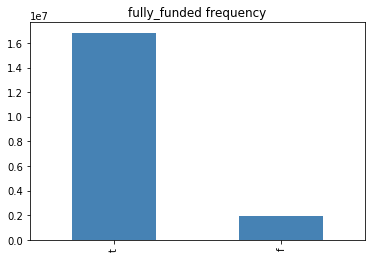

In [6]:
df['fully_funded'].value_counts().plot.bar(title = "fully_funded frequency", color = "steelblue")

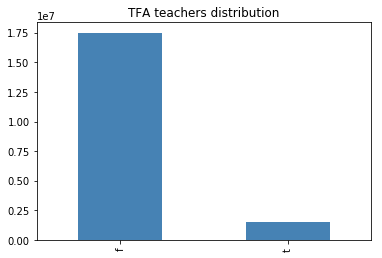

In [7]:
df['teacher_teach_for_america'].value_counts().plot.bar(title = "TFA teachers distribution", color = "steelblue")

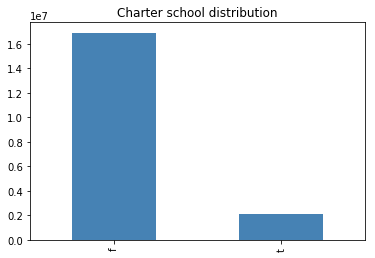

In [8]:
df['school_charter'].value_counts().plot.bar(title = "Charter school distribution", color = "steelblue")

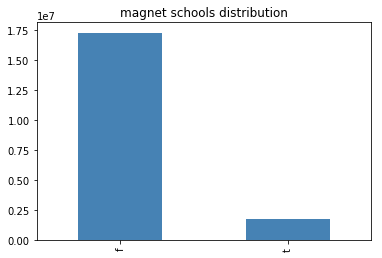

In [9]:
df['school_magnet'].value_counts().plot.bar(title = "magnet schools distribution", color = "steelblue")

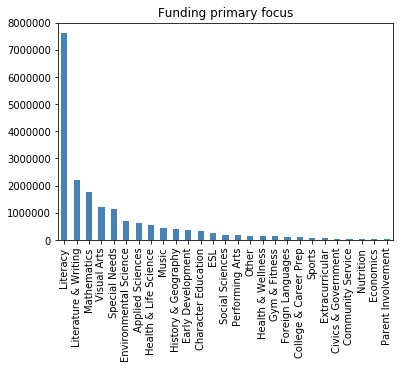

In [10]:
df['primary_focus_subject'].value_counts().plot.bar(title = "Funding primary focus", color = "steelblue")

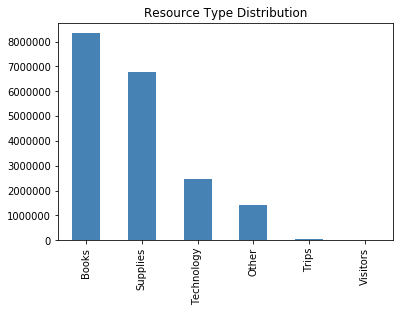

In [11]:
df['resource_type'].value_counts().plot.bar(title = "Resource Type Distribution", color = "steelblue")

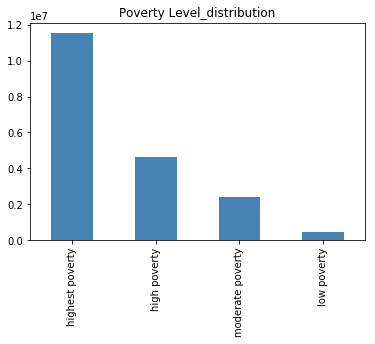

In [12]:
df['poverty_level'].value_counts().plot.bar(title = "Poverty Level_distribution", color = "steelblue")

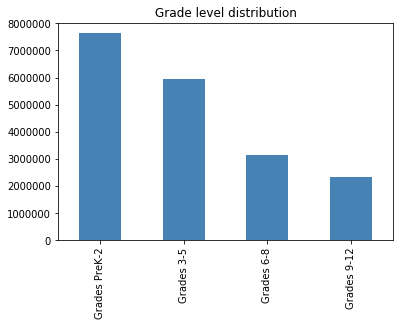

In [13]:
df['grade_level'].value_counts().plot.bar(title = "Grade level distribution", color = "steelblue")

## 2.2.2 Changes and trends over time

In this section, we want to explore the landscape and trends of grantees(schools), donors and grantmaking.

### Sum and rate of fully funded projects over year

Not only we need to learn the grantee side, we should also capture the landscape of grantmaking, and donors.

In [ ]:
sum_cols = ['fully_funded']
df_by_day = df[sum_cols + ['date_posted']]
df_by_day = df_by_day.replace('t', 1).replace('f', 0)
df_by_day = df_by_day.set_index('date_posted')
df_by_day.index = pd.to_datetime(df_by_day.index)
df_by_day['year'] = df_by_day.index.year
df_by_year_sum = df_by_day.groupby('year').sum()
df_by_year_mean = df_by_day.groupby('year').mean()

<Figure size 432x288 with 0 Axes>

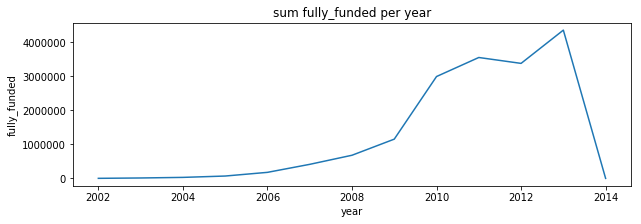

,fully_funded
year,
2002,1463.0
2003,12091.0
2004,29418.0
2005,69049.0
2006,177268.0


In [22]:
plot_hist(df_by_year_sum, 'sum')
df_by_year_sum.head()

### Changes and trends in grants and donors

In [19]:
mean_cols = ['donation_to_project', 'donation_optional_support', 'donation_total', 'item_quantity', 
             'total_price_including_optional_support']
df_by_day = df[mean_cols + ['date_posted']]
df_by_day = df_by_day.set_index('date_posted')
df_by_day.index = pd.to_datetime(df_by_day.index)
df_by_day['year'] = df_by_day.index.year
df_by_year = df_by_day.groupby('year').mean()
df_by_year.head()

,donation_to_project,donation_optional_support,donation_total,item_quantity,total_price_including_optional_support
year,,,,,
2002,561.368417,41.751107,603.119517,9.705750,2029.885007
2003,332.782686,46.947805,379.723427,5.484919,16771.333426
2004,262.941351,38.805454,301.746807,37.283577,774.661285
2005,214.122841,29.425803,243.550009,4.389194,752.023558
2006,180.249763,27.211696,207.465539,3.832543,902.639854


<Figure size 432x288 with 0 Axes>

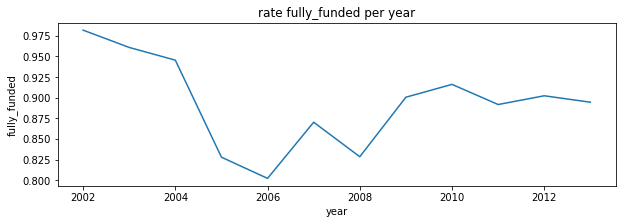

,fully_funded
year,
2002,0.981879
2003,0.960900
2004,0.945491
2005,0.827886
2006,0.802198


In [23]:
plot_hist(df_by_year_mean, 'rate')
df_by_year_mean.head()

<Figure size 432x288 with 0 Axes>

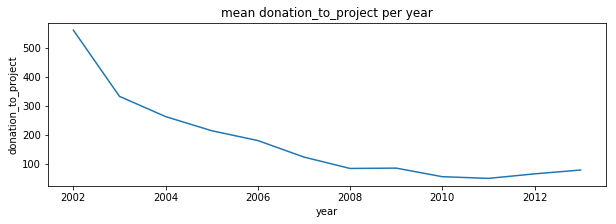

<Figure size 432x288 with 0 Axes>

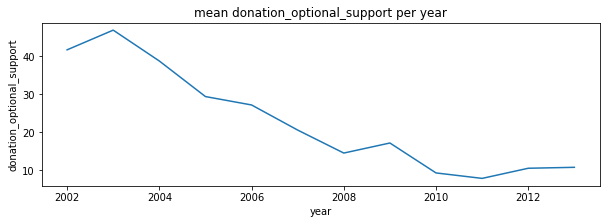

<Figure size 432x288 with 0 Axes>

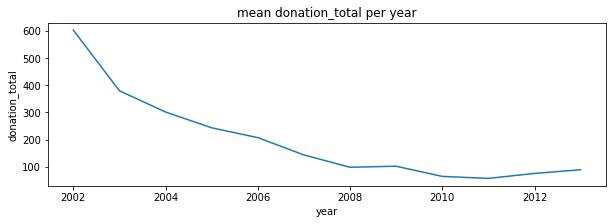

<Figure size 432x288 with 0 Axes>

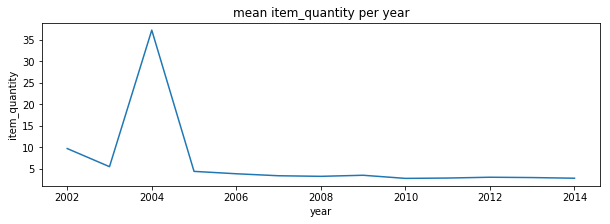

<Figure size 432x288 with 0 Axes>

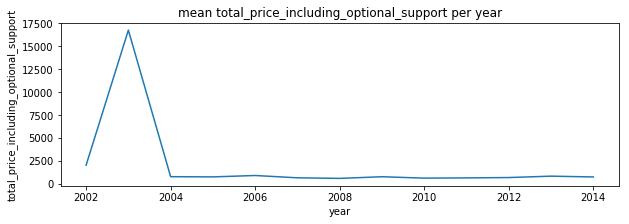

In [20]:
def plot_hist(df, name='mean'):
    for col in df.columns:
        plt.clf()
        plt.figure(figsize=(10, 3))
        plt.plot(df.index, df[col],'')  
        plt.xlabel('year')
        plt.ylabel(col)
        plt.title('{} {} per year'.format(name, col))
        plt.show()

plot_hist(df_by_year)

## 2.3 Cross-tabs

In order to further examine the relations between key factors and fully funded projects, the crosstabs would help us figure out.

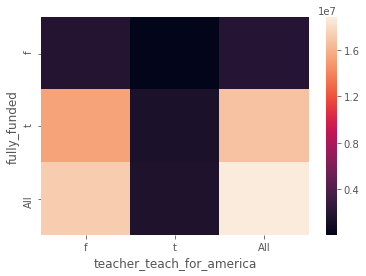

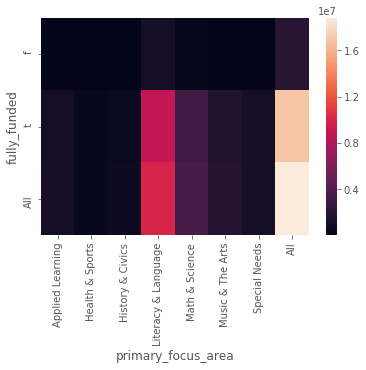

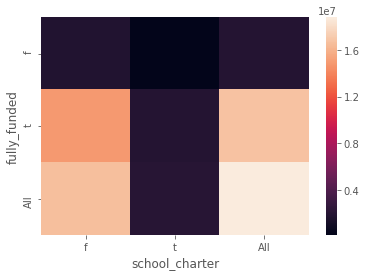

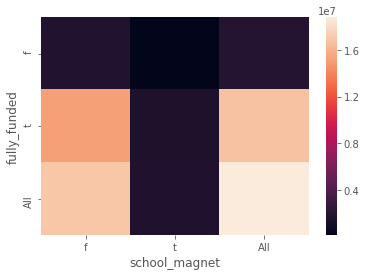

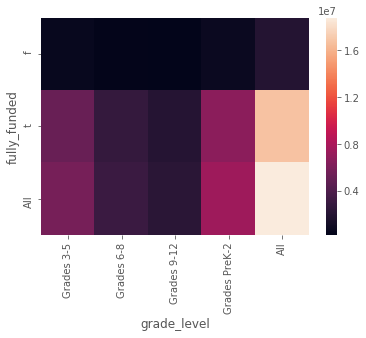

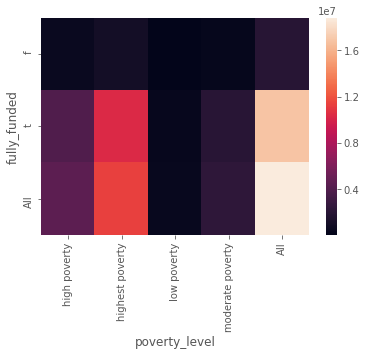

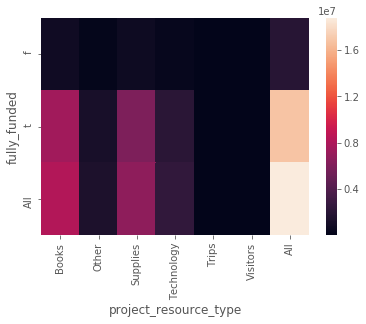

In [29]:
import seaborn as sns

def plot_crosstab(df):
    check_df = df.applymap(lambda x: isinstance(x, (int, float)))
    cols = ["teacher_teach_for_america", "primary_focus_area", "school_charter", "school_magnet", "grade_level", "poverty_level", "project_resource_type"]
    for col in cols:
        plt.clf()
        df_result = pd.crosstab(df['fully_funded'], df[col], margins=True)
        sns.heatmap(df_result, xticklabels=df_result.columns, yticklabels=df_result.index)
        plt.show()
        
 
plot_crosstab(df)

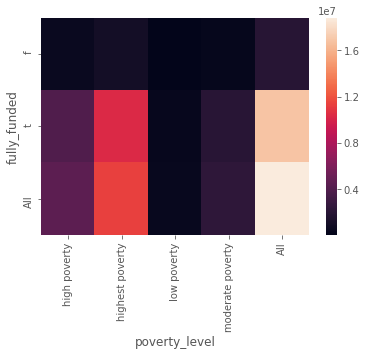

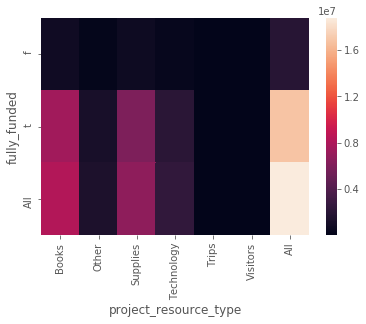

In [28]:
def plot_crosstab(df):
    check_df = df.applymap(lambda x: isinstance(x, (int, float)))
    cols = ["poverty_level", "project_resource_type"]
    for col in cols:
        plt.clf()
        df_result = pd.crosstab(df['fully_funded'], df[col], margins=True)
        sns.heatmap(df_result, xticklabels=df_result.columns, yticklabels=df_result.index)
        plt.show()
        
 
plot_crosstab(df)

### *Remove id columns, address and essay question entries

In order to simplify the data explorations and reduce irrelevant correlations, we select cities, counties or states as representatives of geographic features and remove all the left. IDs of teachers, schools and donors are not the only variables to demonstrate identities, so we remove id columns to reduce training time. In addition, essay questions are out of project scope and we remove them from main data.

In [52]:
df = df.replace('f', 0).replace('t', 1)
exclude_cols = ['school_latitude', 'school_longitude', 'school_zip',
               'donation_message', 'vendor_name', 'item_name', 'item_number', 'school_metro', 'payment_method','donor_zip']
left_cols = [col for col in df.columns if (not col.endswith('id')) and col not in exclude_cols]
df = df[left_cols]
df.head()

,school_city,school_state,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,12.99,2.0


## 2.4 Correlations between variables

In order to investigate the dependence between multiple variables at the same time, we would like to plot a table with correlation coefficients between each variable and the others. The first step is to calculate the correlation matrix, and then plot the heatmap.

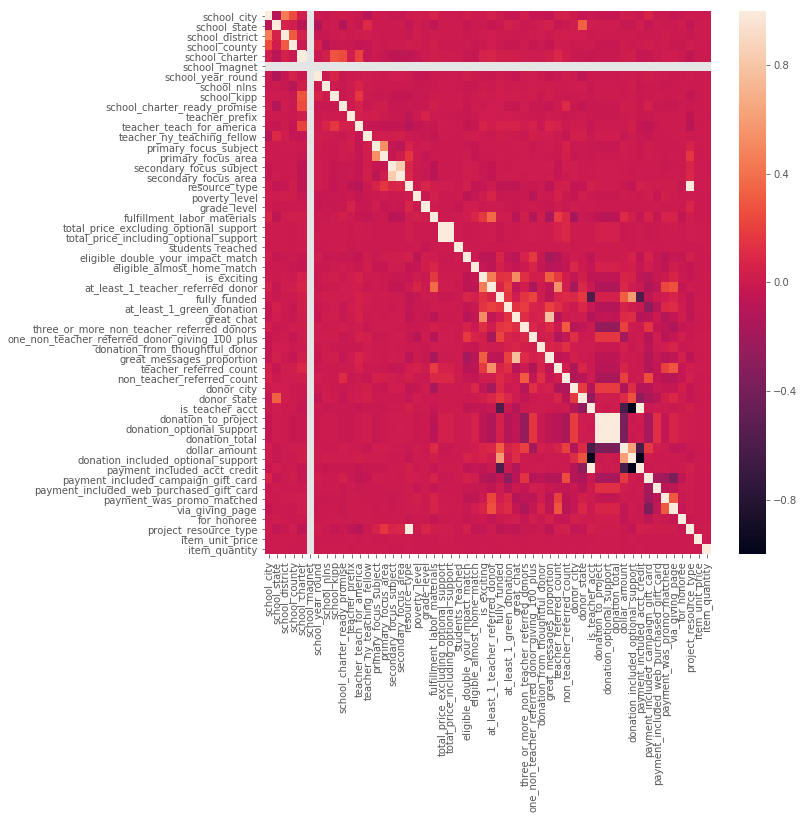

In [63]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Step 3: Pre Process Data

## Change non-numberic columns into numeric variables

We change all of the categorical and dummy variables into numeric variables.

In [66]:
def check_not_numberic(df):
    check_df = df.applymap(lambda x: isinstance(x, (int, float)))
    return [col for col in check_df.columns if any(check_df[col] == False) and col != 'date_posted']
str_cols = check_not_numberic(df)
df[str_cols].head()

""
projectid
00001ccc0e81598c4bd86bacb94d7acb
00001ccc0e81598c4bd86bacb94d7acb
00001ccc0e81598c4bd86bacb94d7acb
00001ccc0e81598c4bd86bacb94d7acb
00001ccc0e81598c4bd86bacb94d7acb


In [57]:
for col in str_cols:
    df[col] = df[col].astype('category').cat.codes

df.head()

,school_city,school_state,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,1411,14,6319,365,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,12.99,2.0


## Check and Fill out missing value

For numerical values, we usually replace missing values with mean, median and zeros. If there are some outliers, try median first since it is less sensitive to them.

In [61]:
def check_missing(df):
    return [col for col in df.columns if any(df[col].isnull()) == True]

def fill_missing(df, col_name, method):
    if method == 'mean':
        df[col_name] = df[col_name].fillna(df[col_name].mean())
    elif method == 'median':
        df[col_name] = df[col_name].fillna(df[col_name].median())
    elif method == 'zero':
        df[col_name] = df[col_name].fillna(0)
        
missing_cols = check_missing(df)
missing_cols

[]

In [60]:
for col in missing_cols:
    fill_missing(df, col, 'mean')
check_missing(df)

[]

As we can see, there is no missing values.

## Drop out outliers

In [47]:
df.describe()

,school_city,school_state,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
count,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,15630539.0,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,...,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07,1.563054e+07
mean,4.356781e+03,2.281804e+01,4.476889e+03,8.261345e+02,1.240360e-01,0.0,4.999917e-02,1.948666e-02,1.160337e-02,8.574944e-03,...,9.960136e-01,1.007812e-01,3.267714e-01,5.443897e-02,7.403351e-02,3.399021e-01,1.932835e-02,1.172780e+00,8.587228e+01,2.997159e+00
std,2.580489e+03,1.574074e+01,2.400330e+03,4.390698e+02,3.296227e-01,0.0,2.179432e-01,1.382278e-01,1.070922e-01,9.220312e-02,...,1.941602e-02,2.946599e-01,4.594168e-01,2.222636e-01,2.561956e-01,4.640554e-01,1.344025e-01,1.138535e+00,1.134515e+05,2.514095e+02
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.014473e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-9.960000e+01,0.000000e+00
25%,1.904000e+03,6.000000e+00,2.426000e+03,4.520000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.290000e+00,1.000000e+00
50%,4.589000e+03,2.200000e+01,4.619000e+03,8.830000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.396000e+01,1.000000e+00
75%,6.621000e+03,3.700000e+01,6.202000e+03,1.155000e+03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.689000e+01,2.000000e+00
max,9.006000e+03,5.100000e+01,9.245000e+03,1.701000e+03,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,4.484216e+08,9.931080e+05


In [48]:
def find_outliers(df, col):
    return df[((df[col] - df[col].mean()) / df[col].std()).abs() >= 3]

def find_all_outliers(df):
    counter = []
    for f in df.columns:
        if f != 'date_posted':
            counter.append((f, len(find_outliers(df, f))))
    counter.sort(key=lambda x: x[1], reverse=True)
    counter = counter[:2]
    return counter
        
cols = find_all_outliers(df)
cols

[('is_teacher_acct', 1531927), ('payment_included_acct_credit', 1508905)]

In [49]:
# use (data - mean) < 3 * std to determine whether to drop
def drop_outliers(df, col):
    return df[((df[col] - df[col].mean()) / df[col].std()).abs() < 3]
old_len = len(df)
for f, _ in cols:
    df = drop_outliers(df, f)

print('drop out {} outliers'.format(old_len - len(df)))

drop out 2794038 outliers


# Step 4: Generate Features

There are 54 variables in our data. In order to find variables that most contribute to the prediction variable, we first plot and select features importance. This step will help us reduce overfitting problem, improve accuracy and reduce training time. 

In [67]:
def sort_features_through_dt(df_features, df_label):
    features = df_features.columns
    model = DecisionTreeClassifier()
    model.fit(df_features, df_label)
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)
    padding = np.arange(len(features)) + 0.5
    plt.figure(figsize=(8, 12))
    plt.barh(padding, importances[sorted_idx], align='center')
    plt.yticks(padding, np.asarray(features)[sorted_idx])
    plt.xlabel("Relative Importance")
    plt.title("Features Importance Through DT")
    
    return list(np.asarray(features)[sorted_idx][::-1])

df['fully_funded'] = df['fully_funded'].astype('int')
all_x= df.drop(['date_posted', 'fully_funded'], axis=1)
all_y = df['fully_funded']

sorted_train_features = sort_features_through_dt(all_x, all_y)

ValueError: labels ['date_posted'] not contained in axis

In [43]:
# Select top 1/3 features
count = int(len(sorted_train_features) * 0.33)
all_x = all_x[sorted_train_features[:count]]
all_x.head()

,donation_included_optional_support,teacher_referred_count,total_price_including_optional_support,non_teacher_referred_count,one_non_teacher_referred_donor_giving_100_plus,total_price_excluding_optional_support,donation_timestamp,great_messages_proportion,school_city,students_reached,is_exciting,at_least_1_teacher_referred_donor,school_county,donation_total,school_state,primary_focus_subject,secondary_focus_subject
projectid,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,1.0,0.0,1498.61,3.0,1.0,1273.82,2446612,33.0,1411,31.0,0.0,0.0,366,5.0,14,18,27
00001ccc0e81598c4bd86bacb94d7acb,1.0,0.0,1498.61,3.0,1.0,1273.82,2446612,33.0,1411,31.0,0.0,0.0,366,5.0,14,18,27
00001ccc0e81598c4bd86bacb94d7acb,1.0,0.0,1498.61,3.0,1.0,1273.82,2446612,33.0,1411,31.0,0.0,0.0,366,5.0,14,18,27
00001ccc0e81598c4bd86bacb94d7acb,1.0,0.0,1498.61,3.0,1.0,1273.82,2446612,33.0,1411,31.0,0.0,0.0,366,5.0,14,18,27
00001ccc0e81598c4bd86bacb94d7acb,1.0,0.0,1498.61,3.0,1.0,1273.82,2446612,33.0,1411,31.0,0.0,0.0,366,5.0,14,18,27


# Step 5: Split Train and Test Set
## Construct test windows

In [51]:
def norm(df_features):
    # normalize
    df_features = preprocessing.MinMaxScaler().fit_transform(df_features)
    df_features = preprocessing.normalize(df_features, norm='max')
    return df_features

def build_test_window(df):
    dataset = []
    name = 'date_posted'
    label_name = 'fully_funded'
    start, end = 2002, 2012
    for year in range(start, end):
        test_year = start + 3
        df_left = df[(df[name] >= '{}-01-01'.format(start)) & (df[name] <= '{}-12-31'.format(start+2))]
        y_train = df_left[label_name]
        x_train = df_left[all_x.columns]
        
        df_right = df[(df[name] >= '{}-01-01'.format(test_year)) & (df[name] <= '{}-12-31'.format(test_year))]
        y_test = df_right[label_name]
        x_test = df_right[all_x.columns]
        
        # normalization
        x_train = norm(x_train)
        x_test = norm(x_test)
        dataset.append((x_train, y_train, x_test, y_test))
    return dataset


dataset = build_test_window(df)
print("has construct {} test window, every three years'data as one".format(len(dataset)))
dataset[0][0][:5]

KeyError: 'date_posted'

# Step 6: Build Classifier

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (precision_recall_curve, roc_auc_score, roc_curve, auc,
                             precision_score, recall_score, f1_score)

In [46]:
classifier_constructors = {
    'LR': LogisticRegression,
    'KNN': KNeighborsClassifier,
    'DT': DecisionTreeClassifier,
    'SVM': SVC,
    'RF': RandomForestClassifier,
    'GB': GradientBoostingClassifier,
    'BG': BaggingClassifier
}

grid = dict()
grid['LR'] = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001 * (10**i) for i in range(5)]
}
grid['DT'] = {
    'max_depth': [1, 20, 50],
    'criterion': ['gini', 'entropy']
}
grid['KNN'] = {
    'n_neighbors': [1, 5, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
grid['SVM'] = {
    'C': [0.1, 0.5, 1],
    'gamma': [1e-3, 1e-4],
    'kernel': ['rbf', 'linear']
}
grid['RF'] = {
    'n_estimators': [1, 5, 10],
    'max_depth': [1, 5, 10], 
    'max_features': ['sqrt', 'log2']
}
grid['GB'] = {
    'n_estimators': [1, 5, 10],
    'learning_rate' : [0.1, 0.5]
}
grid['BG'] = {
    'n_estimators': [1, 5, 10],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
}

## Temporal validations
- Use test data to validate directly.
- KFold cross validation is not suitable for this problem, because this full_funded dataset has a time component.
- Use f1-score to find the best params.

In [53]:
import warnings
warnings.filterwarnings('ignore')

def classify(x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    y_pre = clf.predict(x_test)
    return f1_score(y_test, y_pre)

In [54]:
def select_best_parameters(x_train, y_train, x_test, y_test):
    # iter three times
    number = 3
    # store all the scores and parameters
    classifiers = {}
    results = {}
    for k, clf_constructor in classifier_constructors.items():
        results[k] = []
        params = grid[k]
        for p in ParameterGrid(params):
            clf = clf_constructor(**p)
            f1_scores = [classify(x_train, y_train, x_test, y_test, clf) for i in range(number)]
            f1_score_mean = sum(f1_scores) / len(f1_scores)
            results[k].append((p, f1_score_mean))
    return results

In [57]:
all_best = {}
for x_train, y_train, x_test, y_test in dataset:
    results = select_best_parameters(x_train, y_train, x_test, y_test)
    for k, p_list in results.items():
        p = max(p_list, key=lambda x: x[1])
        if k not in all_best:
            all_best[k] = [p]
        else:
            all_best[k].append(p)
# print last 3 window value
for k, p in all_best.items():
    print(k)
    print('train: 2009-2011, test: 2012', p[-3])
    print('train: 2010-2012, test: 2013', p[-2])
    print('train: 2011-2013, test: 2014', p[-1])

LR
train: 2009-2011, test: 2012 ({'C': 0.1, 'penalty': 'l1'}, 0.9672367787935784)
train: 2010-2012, test: 2013 ({'C': 0.1, 'penalty': 'l1'}, 0.9672367787935784)
train: 2011-2013, test: 2014 ({'C': 0.1, 'penalty': 'l1'}, 0.9672367787935784)
KNN
train: 2009-2011, test: 2012 ({'algorithm': 'auto', 'n_neighbors': 1}, 0.9486497362067424)
train: 2010-2012, test: 2013 ({'algorithm': 'auto', 'n_neighbors': 1}, 0.9486497362067424)
train: 2011-2013, test: 2014 ({'algorithm': 'auto', 'n_neighbors': 1}, 0.9486497362067424)
DT
train: 2009-2011, test: 2012 ({'criterion': 'gini', 'max_depth': 1}, 0.9658795517595405)
train: 2010-2012, test: 2013 ({'criterion': 'gini', 'max_depth': 1}, 0.9658795517595405)
train: 2011-2013, test: 2014 ({'criterion': 'gini', 'max_depth': 1}, 0.9658795517595405)
SVM
train: 2009-2011, test: 2012 ({'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9658795517595405)
train: 2010-2012, test: 2013 ({'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9658795517595405)
train: 2011-2013, t

As we see, when years changes, the best parameters doesn't change almostly.
So we can use 2011-2013/2014 data to evaluate the classifier

# Step 7: Evaluate Classifier
## 7.1 Calculate precision, recall, f1, and auc

In [59]:
# evalute metrics
def evaluate_classifier(y_test, y_pre, y_prob, cost_time=0):
    return {
        'precision': float("%.4f" % precision_score(y_test, y_pre)),
        'recall': float("%.4f" % recall_score(y_test, y_pre)),
        'f1': float("%.4f" % f1_score(y_test, y_pre)),
        'auc': float("%.4f" % roc_auc_score(y_test, y_prob)),
        'cost_time': float("%.4f" % cost_time)
    }

def evaluate_classifiers(X_test, y_test, threshold):
    metrics = dict()
    probas = dict()
    for k, clf in classifiers.items():
        start = time.time()
        if hasattr(clf, 'predict_proba'):
            y_prob = clf.predict_proba(X_test)[:, 1]
        else:
            y_prob = clf.decision_function(X_test)
        y_pre = np.asarray([1 if run >= threshold else 0 for run in y_prob])
        cost_time = time.time() - start
        metrics[k] = evaluate_classifier(y_test, y_pre, y_prob, cost_time)
        probas[k] = y_prob
    return metrics, probas
        
# we use 2011-2013 data for train, 2014 data for test
classifiers = {}
x_train, y_train, x_test, y_test = dataset[-1]

for k, p in all_best.items():
    clf = classifier_constructors[k](**p[-1][0])
    clf.fit(x_train, y_train)
    classifiers[k] = clf

metrics, probas = evaluate_classifiers(x_test, y_test, 0.05)
metrics

{'BG': {'auc': 0.923,
  'cost_time': 0.0468,
  'f1': 0.9484,
  'precision': 0.903,
  'recall': 0.9987},
 'DT': {'auc': 0.8698,
  'cost_time': 0.0225,
  'f1': 0.8878,
  'precision': 0.7982,
  'recall': 1.0},
 'GB': {'auc': 0.9271,
  'cost_time': 0.0209,
  'f1': 0.8878,
  'precision': 0.7982,
  'recall': 1.0},
 'KNN': {'auc': 0.8636,
  'cost_time': 15.8049,
  'f1': 0.9486,
  'precision': 0.9433,
  'recall': 0.954},
 'LR': {'auc': 0.9689,
  'cost_time': 0.0323,
  'f1': 0.9442,
  'precision': 0.8952,
  'recall': 0.9988},
 'RF': {'auc': 0.867,
  'cost_time': 0.021,
  'f1': 0.8681,
  'precision': 0.804,
  'recall': 0.9433},
 'SVM': {'auc': 0.8267,
  'cost_time': 6.2157,
  'f1': 0.9659,
  'precision': 0.9392,
  'recall': 0.9941}}

## 7.2 Draw AUC

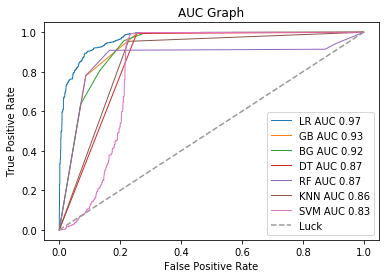

In [60]:
def draw_auc(probas, y_test):
    plt.clf()
    auc_list = []
    for k, prob in probas.items():
        fpr, tpr, thresholds = roc_curve(y_test, prob)
        roc_auc = auc(fpr, tpr)
        auc_list.append((k, roc_auc))
        
    auc_list.sort(key=lambda x: x[1], reverse=True)
    
    for k, roc_auc in auc_list:
        fpr, tpr, thresholds = roc_curve(y_test, probas[k])
        plt.plot(fpr, tpr, lw=1, label=('%s AUC %.2f' % (k, roc_auc)))
    
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Graph')
    plt.legend(loc="lower right")

draw_auc(probas, y_test)

## 7.3 Draw Precision-Recall Curves

<Figure size 432x288 with 0 Axes>

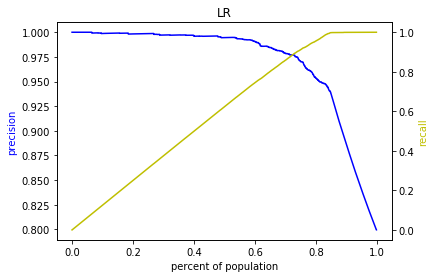

<Figure size 432x288 with 0 Axes>

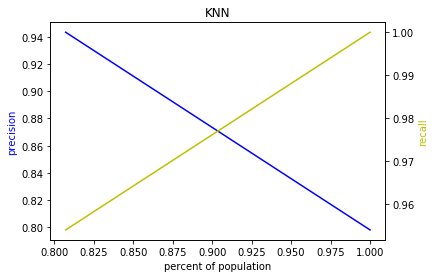

<Figure size 432x288 with 0 Axes>

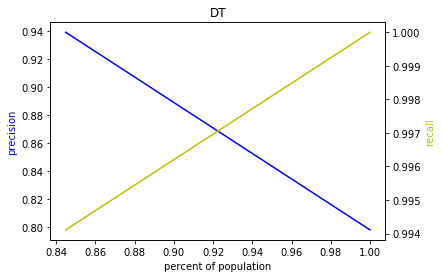

<Figure size 432x288 with 0 Axes>

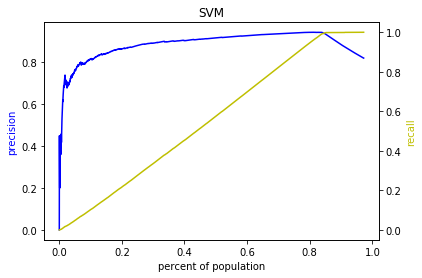

<Figure size 432x288 with 0 Axes>

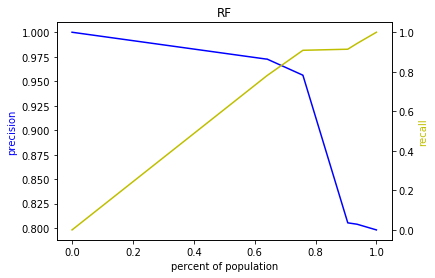

<Figure size 432x288 with 0 Axes>

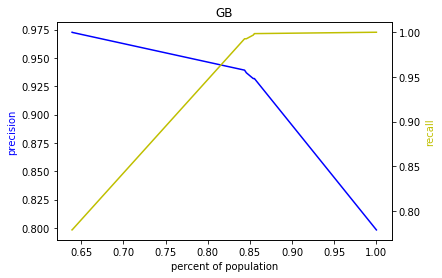

<Figure size 432x288 with 0 Axes>

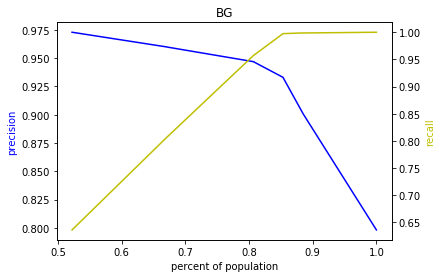

In [61]:
def plot_precision_recall(y_test, key):
    plt.clf()
    y_prob = probas[key]
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_prob)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_per_thresh = []
    number_scored = len(y_prob)
    for value in pr_thresholds:
        num_above_thresh = len(y_prob[y_prob >= value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_per_thresh.append(pct_above_thresh)
    pct_per_thresh = np.array(pct_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_per_thresh, recall_curve, 'y')
    ax2.set_ylabel('recall', color='y')
    plt.title(key)
    plt.show()
    
for key in probas.keys():
    plot_precision_recall(y_test, key)

## 7.4 Draw Precision, Recall, Auc and F1

In [62]:
data = dict()
data['key'] =  ['precision', 'recall', 'f1', 'auc', 'cost_time']

for k, metric in metrics.items():
    data[k] = [metric[item] for item in data['key']]

df_result = pd.DataFrame(data)

df_result = df_result.set_index('key')
df_result.head()

,BG,DT,GB,KNN,LR,RF,SVM
key,,,,,,,
precision,0.9030,0.7982,0.7982,0.9433,0.8952,0.8040,0.9392
recall,0.9987,1.0000,1.0000,0.9540,0.9988,0.9433,0.9941
f1,0.9484,0.8878,0.8878,0.9486,0.9442,0.8681,0.9659
auc,0.9230,0.8698,0.9271,0.8636,0.9689,0.8670,0.8267
cost_time,0.0468,0.0225,0.0209,15.8049,0.0323,0.0210,6.2157


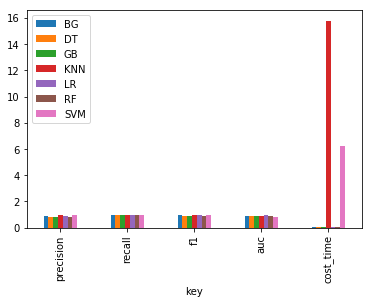

In [63]:
df_result.plot.bar();
plt.show()

## 7. 5 The Best Classifier

In [64]:
# find the best one
def find_the_best_model(target='auc'):
    metrics_list = list(metrics.items())
    metrics_list.sort(key=lambda x: x[1][target], reverse=True)
    return metrics_list[0]

best = find_the_best_model('precision')
best

('KNN',
 {'auc': 0.8636,
  'cost_time': 15.8049,
  'f1': 0.9486,
  'precision': 0.9433,
  'recall': 0.954})

In [65]:
def get_baseline_metric():
    base_clf = DummyClassifier()
    base_clf.fit(x_train, y_train)
    start = time.time()
    y_pre = base_clf.predict(x_test)
    cost_time = time.time() - start
    y_prob = base_clf.predict_proba(x_test)[:, 1]
    return evaluate_classifier(y_test, y_pre, y_prob, cost_time)

baseline_metric = get_baseline_metric()
('Baseline', baseline_metric)

('Baseline',
 {'auc': 0.4981,
  'cost_time': 0.0119,
  'f1': 0.8665,
  'precision': 0.7986,
  'recall': 0.9471})

## 7. 6 Compare to Baseline

In [66]:
thresholds = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5]
threshold_metrics = {}
for threshold in thresholds:
    threshold_metrics[str(threshold)] = evaluate_classifiers(x_test, y_test, threshold)[0]  

In [67]:
data = dict()
data['key'] =  ['best-%s' % item for item in thresholds] + ['baseline']

for k in ['recall', 'f1', 'auc', 'precision', 'cost_time']:
    data[k] = [threshold_metrics[str(threshold)][best[0]][k] for threshold in thresholds]
    data[k].append(baseline_metric[k])

    
df_result = pd.DataFrame(data)
df_result = df_result.set_index('key')
df_result = df_result.sort_values(by='precision')[::-1]
df_result.head(10)

,auc,cost_time,f1,precision,recall
key,,,,,
best-0.5,0.8636,14.8256,0.9486,0.9433,0.9540
best-0.3,0.8636,14.9821,0.9486,0.9433,0.9540
best-0.2,0.8636,14.8049,0.9486,0.9433,0.9540
best-0.1,0.8636,15.0457,0.9486,0.9433,0.9540
best-0.05,0.8636,15.5156,0.9486,0.9433,0.9540
best-0.02,0.8636,14.9480,0.9486,0.9433,0.9540
best-0.01,0.8636,14.6744,0.9486,0.9433,0.9540
baseline,0.4981,0.0119,0.8665,0.7986,0.9471


As we see, when threshold equals 0.5, the classifier perform best. But baseline classifier cost the least.